<img src="mioti.png" style="height: 100px">
<center style="color:#888">Data Science with Python</center>

# DSPy6 Pandas IoT I. Challenge. 

<img src="madrid_central.png" style="width: 600px">


Vamos a practicar series temporales con los [datos del "Sistema Integral de la Calidad del Aire del Ayuntamiento de Madrid"](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=f3c0f7d512273410VgnVCM2000000c205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default) que publica su portal de datos abiertos.

El objetivo de la práctica es ver cómo varió la presencia de dióxido de nitrógeno (NO2) en las mediciones realizadas por una estación de calidad del aire de dentro de Madrid Central, en torno a la fecha en que se activó por primera vez la restricción. **¿Disminuyó la concentracion de NO2 en el aire tras la aplicación de Madrid Central?**



## Inicialización

La siguiente celda importa geopandas y mplleaflet y en el caso de que no esten instaldos lo hará. **Teneis que descomentar las siguientes líneas:** 

In [1]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# import sys
# try: 
#     import geopandas as gpd
#     from shapely.geometry import Point
# except:
#     !conda install --yes --prefix {sys.prefix} geopandas
# try:
#     import mplleaflet
# except:
#     !conda install -c conda-forge --yes --prefix {sys.prefix} mplleaflet

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 9)
from pathlib import Path
import geopandas as gpd
from shapely.geometry import Point

## Pasos

### Carga de los datos

Madrid Central entró en vigor el **30 de noviembre de 2018**. Desafortunadamente, los datos vienen en este caso en CSV por mes. **Lee todos los CSVs de 2018, 2019 y 2020 y juntalos en un único dataframe.**


In [3]:
air_q = pd.DataFrame()
lista_ficheros=[]
for csv_file in Path('.').glob('Anio*/*.csv'):
    # ToDo: rellenad esto con el código necesario para leer!
    lista_ficheros.append(pd.read_csv(csv_file,sep=';'))
    print(csv_file)


Anio201810\abr_mo18.csv
Anio201810\ago_mo18.csv
Anio201810\dic_mo18.csv
Anio201810\ene_mo18.csv
Anio201810\feb_mo18.csv
Anio201810\jul_mo18.csv
Anio201810\jun_mo18.csv
Anio201810\mar_mo18.csv
Anio201810\may_mo18.csv
Anio201810\nov_mo18.csv
Anio201810\oct_mo18.csv
Anio201810\sep_mo18.csv
Anio201912\abr_mo19.csv
Anio201912\ago_mo19.csv
Anio201912\dic_mo19.csv
Anio201912\ene_mo19.csv
Anio201912\feb_mo19.csv
Anio201912\jul_mo19.csv
Anio201912\jun_mo19.csv
Anio201912\mar_mo19.csv
Anio201912\may_mo19.csv
Anio201912\nov_mo19.csv
Anio201912\oct_mo19.csv
Anio201912\sep_mo19.csv
Anio202009\abr_mo20.csv
Anio202009\ago_mo20.csv
Anio202009\ene_mo20.csv
Anio202009\feb_mo20.csv
Anio202009\jul_mo20.csv
Anio202009\jun_mo20.csv
Anio202009\mar_mo20.csv
Anio202009\may_mo20.csv
Anio202009\sep_mo20.csv


In [4]:
air_q = pd.concat(lista_ficheros)
air_q.reset_index(drop=True)


,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,4,1,28079004_1_38,2018,4,1,2.00,V,...,2.00,V,2.00,V,3.00,V,4.00,V,3.00,V
1,28,79,4,1,28079004_1_38,2018,4,2,2.00,V,...,2.00,V,2.00,V,2.00,V,2.00,V,2.00,V
2,28,79,4,1,28079004_1_38,2018,4,3,2.00,V,...,2.00,V,2.00,V,2.00,V,2.00,V,2.00,V
3,28,79,4,1,28079004_1_38,2018,4,4,2.00,V,...,2.00,V,2.00,V,2.00,V,2.00,V,2.00,V
4,28,79,4,1,28079004_1_38,2018,4,5,2.00,V,...,2.00,V,2.00,V,4.00,V,5.00,V,4.00,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151265,28,79,60,14,28079060_14_6,2020,9,26,63.31,V,...,74.69,V,68.08,V,65.12,V,63.61,V,61.34,V
151266,28,79,60,14,28079060_14_6,2020,9,27,61.82,V,...,78.70,V,73.47,V,72.61,N,59.40,N,60.88,V
151267,28,79,60,14,28079060_14_6,2020,9,28,63.40,V,...,74.10,V,35.61,N,9.94,N,6.87,N,12.84,N
151268,28,79,60,14,28079060_14_6,2020,9,29,19.41,N,...,68.28,V,28.01,V,22.89,V,10.15,V,11.66,V


In [5]:
air_q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151270 entries, 0 to 4573
Data columns (total 56 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PROVINCIA       151270 non-null  int64  
 1   MUNICIPIO       151270 non-null  int64  
 2   ESTACION        151270 non-null  int64  
 3   MAGNITUD        151270 non-null  int64  
 4   PUNTO_MUESTREO  151270 non-null  object 
 5   ANO             151270 non-null  int64  
 6   MES             151270 non-null  int64  
 7   DIA             151270 non-null  int64  
 8   H01             151270 non-null  float64
 9   V01             151270 non-null  object 
 10  H02             151270 non-null  float64
 11  V02             151270 non-null  object 
 12  H03             151270 non-null  float64
 13  V03             151270 non-null  object 
 14  H04             151270 non-null  float64
 15  V04             151270 non-null  object 
 16  H05             151270 non-null  float64
 17  V05         

El datafreme una vez completado lo anterior, tiene esta pinta: 
<img src="dataset.png" style="width: 800px">

### Filtrado

El siguiente plot muestra sobre un mapa la zona a la que aplica Madrid Central, junto con las estaciones de medición de calidad del aire:

In [6]:
# import os
# os.environ["PROJ_LIB"]= 'C:/Users/JPAS/Anaconda3/Library/share'

gdf = gpd.read_file("Madrid_Central/Madrid_Central.shp")
gdf = gdf.to_crs(epsg=3857)
est = pd.read_csv('estaciones.csv', delimiter=';', encoding='latin-1', decimal='.')
gdf_est = gpd.GeoDataFrame(
    est, 
    geometry=[Point(x, y) for x, y in zip(est.LONGITUD, est.LATITUD)]
)
gdf_est.crs = {'init' :'epsg:4326'}
gdf_est = gdf_est.to_crs(epsg=3857)
import mplleaflet
ax = gdf.plot(facecolor='grey', edgecolor='black')
gdf_est.plot(ax=ax, marker='+', color='black', markersize=300.0)
mplleaflet.display(fig=ax.figure, crs=gdf.crs)


# gdf = gpd.read_file("Madrid_Central/Madrid_Central.shp")
# gdf.crs = {'init' :'epsg:25830'}
# #gdf = gdf.to_crs(epsg=3857)
# est = pd.read_csv('estaciones.csv', delimiter=';', encoding='latin-1', decimal='.')
# gdf_est = gpd.GeoDataFrame(
#     est,
#     geometry=[Point(x, y) for x, y in zip(est.LONGITUD, est.LATITUD)]
# )
# gdf_est.crs = {'init' :'epsg:4326'}
# gdf_est = gdf_est.to_crs(epsg=3857)
# import mplleaflet
# ax = gdf.plot(facecolor='grey', edgecolor='black')
# gdf_est.plot(ax=ax, marker='+', color='black', markersize=300.0)
# mplleaflet.display(fig=ax.figure, crs=gdf.crs)


C:\Users\JPAS\Anaconda3\lib\site-packages\mplleaflet\mplexporter\exporter.py:263: MatplotlibDeprecationWarning: 
The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_order = offset_dict[collection.get_offset_position()]
C:\Users\JPAS\Anaconda3\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


La única estación que está dentro de Madrid Central plenamente es la de "Pza. del Carmen". **Filtra el dataframe `air_q` para quedarte con la información relativa solo a esa estación**. Busca manualmente qué puedes usar para filtrar en `estacion.csv`, ayudándote de la documentación en el PDF `Interprete_ficheros_ calidad_ del_ aire_global.pdf`. Elimina las columnas `PROVINCIA`, `MUNICIPIO`, `ESTACION`y `PUNTO_MUESTREO`, que ya no las vamos a necesitar.

In [7]:
# Hacemos un innerjoin para rescatar los datos de medición de la estación de pza del carmen.
# lo vamos a hacer 
df_estacion=pd.read_csv('estaciones.csv',sep=';',encoding='latin-1')
df_estacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODIGO               24 non-null     int64  
 1   CODIGO_CORTO         24 non-null     int64  
 2   ESTACION             24 non-null     object 
 3   DIRECCION            24 non-null     object 
 4   LONGITUD_ETRS89      24 non-null     object 
 5   LATITUD_ETRS89       24 non-null     object 
 6   ALTITUD              24 non-null     int64  
 7   COD_TIPO             24 non-null     object 
 8   NOM_TIPO             24 non-null     object 
 9   NO2                  24 non-null     object 
 10  SO2                  10 non-null     object 
 11  CO                   10 non-null     object 
 12  PM10                 13 non-null     object 
 13  PM2_5                7 non-null      object 
 14  O3                   14 non-null     object 
 15  BTX                  6 non-null      objec

In [8]:
#Seleccionamos los datos de la estación de Pza. del Carmen
df_estacion_carmen=df_estacion[df_estacion['ESTACION']=='Pza. del Carmen']
df_estacion_carmen

,CODIGO,CODIGO_CORTO,ESTACION,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,COD_TIPO,NOM_TIPO,NO2,...,HC,COD_VIA,VIA_CLASE,VIA_PAR,VIA_NOMBRE,Fecha alta,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD
8,28079035,35,Pza. del Carmen,Plaza del Carmen esq. Tres Cruces.,"3°42'11.40""O","40°25'9.15""N",660,UF,Urbana fondo,X,...,NaN,145800,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209


In [9]:
df_estacion_carmen_medicion = air_q[air_q['PUNTO_MUESTREO'].str.contains('28079035')]
df_estacion_carmen_medicion

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
1850,28,79,35,1,28079035_1_38,2018,4,1,7.00,V,...,7.00,V,9.00,V,7.00,V,7.00,V,8.00,V
1851,28,79,35,1,28079035_1_38,2018,4,2,9.00,V,...,7.00,V,7.00,V,7.00,V,1.00,V,1.00,V
1852,28,79,35,1,28079035_1_38,2018,4,3,3.00,V,...,4.00,V,4.00,V,6.00,V,7.00,V,7.00,V
1853,28,79,35,1,28079035_1_38,2018,4,4,6.00,V,...,5.00,V,6.00,V,6.00,V,7.00,V,7.00,V
1854,28,79,35,1,28079035_1_38,2018,4,5,7.00,V,...,7.00,V,7.00,V,7.00,V,9.00,V,8.00,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,28,79,35,14,28079035_14_6,2020,9,26,51.52,V,...,66.20,V,57.52,V,61.00,V,53.43,V,54.12,V
2066,28,79,35,14,28079035_14_6,2020,9,27,53.64,V,...,70.40,V,65.10,V,60.19,V,57.85,V,56.47,V
2067,28,79,35,14,28079035_14_6,2020,9,28,54.39,V,...,76.50,V,47.63,V,28.81,V,9.33,V,3.49,V
2068,28,79,35,14,28079035_14_6,2020,9,29,3.20,V,...,88.51,V,58.16,V,31.01,V,6.03,V,4.14,V


In [10]:
# Hacemos un innerjoin para rescatar los datos de medición de la estación de pza del carmen.
# lo vamos a hacer por los campos CODIGO_CORTO y ESTACION.
df_estacion_carmen_medicion=pd.merge(air_q,df_estacion_carmen, how='inner', left_on='ESTACION', right_on='CODIGO_CORTO')
df_estacion_carmen_medicion=df_estacion_carmen_medicion.drop(columns=['PROVINCIA', 'MUNICIPIO', 'ESTACION_x','ESTACION_y','PUNTO_MUESTREO'])
air_q=df_estacion_carmen_medicion
air_q

,MAGNITUD,ANO,MES,DIA,H01,V01,H02,V02,H03,V03,...,HC,COD_VIA,VIA_CLASE,VIA_PAR,VIA_NOMBRE,Fecha alta,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD
0,1,2018,4,1,7.00,V,6.00,V,5.00,V,...,NaN,145800,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209
1,1,2018,4,2,9.00,V,7.00,V,5.00,V,...,NaN,145800,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209
2,1,2018,4,3,3.00,V,4.00,V,5.00,V,...,NaN,145800,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209
3,1,2018,4,4,6.00,V,7.00,V,7.00,V,...,NaN,145800,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209
4,1,2018,4,5,7.00,V,5.00,V,5.00,V,...,NaN,145800,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5979,14,2020,9,26,51.52,V,51.70,V,51.22,V,...,NaN,145800,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209
5980,14,2020,9,27,53.64,V,52.73,V,53.98,V,...,NaN,145800,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209
5981,14,2020,9,28,54.39,V,28.72,V,22.32,V,...,NaN,145800,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209
5982,14,2020,9,29,3.20,V,20.53,V,42.57,V,...,NaN,145800,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209


### Cambio de estructura de los valores de medición

Si atendemos a `Interprete_ficheros_ calidad_ del_ aire_global.pdf`, observamos que las mediciones vienen en un formato con el que no nos va a resultar muy sencillo trabajar: cada fila contiene 24 mediciones (una por hora) de cada uno de los compuestos que se miden en el aire (el compuesto que se mide viene indicado en la columna `MAGNITUD`). Para facilitar que trabajemos con ello, vamos a hacer que cada fila contenga solo una hora (y la medición de esa hora). Por tanto, por cada fila de `air_q`, vamos a tener 24 filas de `unstacked_air_q`:

In [11]:

#unstacked_air_q = air_q.filter(regex="H.*").unstack().reset_index(level=0)

unstacked_air_q = air_q.filter(regex="H[0-9]").unstack().reset_index(level=0)

#unstacked_air_q=unstacked_air_q[unstacked_air_q['level_0']=='H23']
unstacked_air_q

,level_0,0
0,H01,7.00
1,H01,9.00
2,H01,3.00
3,H01,6.00
4,H01,7.00
...,...,...
5979,H24,54.12
5980,H24,56.47
5981,H24,3.49
5982,H24,4.14


Las nuevas filas de `unstacked_air_q` preservan el índice de la fila a partir del cual se generaron. **Mergea unstacked_air_q con air_q**. Así tendremos air_q con una medición por hora y fila:

In [12]:
df_merge_air_q=pd.merge(air_q,unstacked_air_q, how='inner', left_index=True, right_index=True)
df_merge_air_q

,MAGNITUD,ANO,MES,DIA,H01,V01,H02,V02,H03,V03,...,VIA_CLASE,VIA_PAR,VIA_NOMBRE,Fecha alta,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD,level_0,0
0,1,2018,4,1,7.00,V,6.00,V,5.00,V,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H01,7.00
0,1,2018,4,1,7.00,V,6.00,V,5.00,V,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H02,6.00
0,1,2018,4,1,7.00,V,6.00,V,5.00,V,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H03,5.00
0,1,2018,4,1,7.00,V,6.00,V,5.00,V,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H04,5.00
0,1,2018,4,1,7.00,V,6.00,V,5.00,V,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H05,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,14,2020,9,30,1.73,V,15.55,V,62.17,V,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H20,100.60
5983,14,2020,9,30,1.73,V,15.55,V,62.17,V,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H21,86.70
5983,14,2020,9,30,1.73,V,15.55,V,62.17,V,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H22,77.00
5983,14,2020,9,30,1.73,V,15.55,V,62.17,V,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H23,83.21


**Elimina ahora todas las columnas "H*" y "V*", que ya no son necesarias**:

In [13]:
df_merge_air_q=df_merge_air_q.drop(columns=df_merge_air_q.filter(regex='H[0-9]|V[0-9]').columns)
df_merge_air_q


,MAGNITUD,ANO,MES,DIA,CODIGO,CODIGO_CORTO,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,...,VIA_CLASE,VIA_PAR,VIA_NOMBRE,Fecha alta,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD,level_0,0
0,1,2018,4,1,28079035,35,Plaza del Carmen esq. Tres Cruces.,"3°42'11.40""O","40°25'9.15""N",660,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H01,7.00
0,1,2018,4,1,28079035,35,Plaza del Carmen esq. Tres Cruces.,"3°42'11.40""O","40°25'9.15""N",660,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H02,6.00
0,1,2018,4,1,28079035,35,Plaza del Carmen esq. Tres Cruces.,"3°42'11.40""O","40°25'9.15""N",660,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H03,5.00
0,1,2018,4,1,28079035,35,Plaza del Carmen esq. Tres Cruces.,"3°42'11.40""O","40°25'9.15""N",660,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H04,5.00
0,1,2018,4,1,28079035,35,Plaza del Carmen esq. Tres Cruces.,"3°42'11.40""O","40°25'9.15""N",660,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H05,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,14,2020,9,30,28079035,35,Plaza del Carmen esq. Tres Cruces.,"3°42'11.40""O","40°25'9.15""N",660,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H20,100.60
5983,14,2020,9,30,28079035,35,Plaza del Carmen esq. Tres Cruces.,"3°42'11.40""O","40°25'9.15""N",660,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H21,86.70
5983,14,2020,9,30,28079035,35,Plaza del Carmen esq. Tres Cruces.,"3°42'11.40""O","40°25'9.15""N",660,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H22,77.00
5983,14,2020,9,30,28079035,35,Plaza del Carmen esq. Tres Cruces.,"3°42'11.40""O","40°25'9.15""N",660,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H23,83.21


**Renombra `level_0` a `HORA` y `0` a `VALOR`**:

In [14]:
df_merge_air_q=df_merge_air_q.rename(columns={'level_0':'HORA',0:'VALOR'})
df_merge_air_q

,MAGNITUD,ANO,MES,DIA,CODIGO,CODIGO_CORTO,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,...,VIA_CLASE,VIA_PAR,VIA_NOMBRE,Fecha alta,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD,HORA,VALOR
0,1,2018,4,1,28079035,35,Plaza del Carmen esq. Tres Cruces.,"3°42'11.40""O","40°25'9.15""N",660,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H01,7.00
0,1,2018,4,1,28079035,35,Plaza del Carmen esq. Tres Cruces.,"3°42'11.40""O","40°25'9.15""N",660,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H02,6.00
0,1,2018,4,1,28079035,35,Plaza del Carmen esq. Tres Cruces.,"3°42'11.40""O","40°25'9.15""N",660,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H03,5.00
0,1,2018,4,1,28079035,35,Plaza del Carmen esq. Tres Cruces.,"3°42'11.40""O","40°25'9.15""N",660,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H04,5.00
0,1,2018,4,1,28079035,35,Plaza del Carmen esq. Tres Cruces.,"3°42'11.40""O","40°25'9.15""N",660,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H05,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,14,2020,9,30,28079035,35,Plaza del Carmen esq. Tres Cruces.,"3°42'11.40""O","40°25'9.15""N",660,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H20,100.60
5983,14,2020,9,30,28079035,35,Plaza del Carmen esq. Tres Cruces.,"3°42'11.40""O","40°25'9.15""N",660,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H21,86.70
5983,14,2020,9,30,28079035,35,Plaza del Carmen esq. Tres Cruces.,"3°42'11.40""O","40°25'9.15""N",660,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H22,77.00
5983,14,2020,9,30,28079035,35,Plaza del Carmen esq. Tres Cruces.,"3°42'11.40""O","40°25'9.15""N",660,...,PLAZA,DEL,CARMEN,01/11/1999,"440346,3619","4474524,357",-3.703166,40.419209,H23,83.21


In [15]:
air_q=df_merge_air_q.filter(['MAGNITUD','ANO','MES','DIA','HORA','VALOR'])
air_q

,MAGNITUD,ANO,MES,DIA,HORA,VALOR
0,1,2018,4,1,H01,7.00
0,1,2018,4,1,H02,6.00
0,1,2018,4,1,H03,5.00
0,1,2018,4,1,H04,5.00
0,1,2018,4,1,H05,4.00
...,...,...,...,...,...,...
5983,14,2020,9,30,H20,100.60
5983,14,2020,9,30,H21,86.70
5983,14,2020,9,30,H22,77.00
5983,14,2020,9,30,H23,83.21


Una vez completado lo anterior, tenemos un dataframe con esta pinta:

<img src="dataset_transform.png" style="width: 300px">


### Indexar por tiempo

Ahora, crea una nueva columna a partir de `"ANO", "MES", "DIA", "HORA"` y obten una nueva columna con la fecha:

In [16]:
df_timestamp = air_q.copy()
# Convierte la columna "HORA" en un entero
#df_timestamp['HORA'] = df_timestamp['HORA'].str[1:]

# Cambia el valor "24" de "HORA" por "OO"
df_timestamp['HORA'] = pd.to_numeric(df_timestamp['HORA'].str[1:].apply(lambda x: x if x != '24' else '00'))

# Crea la nueva columna "TIMESTAMP"

df_timestamp['TIMESTAMP']=pd.to_datetime(dict(year=df_timestamp.ANO, month=df_timestamp.MES, day=df_timestamp.DIA, hour=df_timestamp.HORA ))
air_q=df_timestamp
air_q

,MAGNITUD,ANO,MES,DIA,HORA,VALOR,TIMESTAMP
0,1,2018,4,1,1,7.00,2018-04-01 01:00:00
0,1,2018,4,1,2,6.00,2018-04-01 02:00:00
0,1,2018,4,1,3,5.00,2018-04-01 03:00:00
0,1,2018,4,1,4,5.00,2018-04-01 04:00:00
0,1,2018,4,1,5,4.00,2018-04-01 05:00:00
...,...,...,...,...,...,...,...
5983,14,2020,9,30,20,100.60,2020-09-30 20:00:00
5983,14,2020,9,30,21,86.70,2020-09-30 21:00:00
5983,14,2020,9,30,22,77.00,2020-09-30 22:00:00
5983,14,2020,9,30,23,83.21,2020-09-30 23:00:00


### Magnitudes medidas
Pivota ahora la tabla en torno a `MAGNITUD`, para que cada magnitud sea una columna. Esta tabla pivotada tendrá como índice "TIMESTAMP", como valores "VALOR" y como columnas "MAGNITUD". 

In [17]:
df_pivot = pd.pivot_table(air_q, values='VALOR', index=['TIMESTAMP'],
                     columns=['MAGNITUD'])
df_pivot

MAGNITUD,1,6,7,8,12,14
TIMESTAMP,,,,,,
2018-01-01 00:00:00,6.0,0.4,2.0,22.0,25.0,32.60
2018-01-01 01:00:00,5.0,0.2,2.0,19.0,21.0,41.97
2018-01-01 02:00:00,5.0,0.3,3.0,29.0,34.0,30.16
2018-01-01 03:00:00,6.0,0.2,7.0,35.0,45.0,24.23
2018-01-01 04:00:00,6.0,0.2,13.0,38.0,57.0,24.16
...,...,...,...,...,...,...
2020-09-30 19:00:00,9.0,0.4,3.0,21.0,26.0,110.10
2020-09-30 20:00:00,9.0,0.5,1.0,23.0,25.0,100.60
2020-09-30 21:00:00,9.0,0.5,2.0,29.0,32.0,86.70


En este punto tendremos lo siguiente:
<img src="magnitude_transform.png" style="width: 300px">


Ponle nombre a las magnitudes según lo que se explica en `Interprete_ficheros_ calidad_ del_ aire_global.pdf`

In [22]:
df_magnitudes=df_pivot.rename(columns = {1: 'SO2', 6: 'CO', 7: 'NO', 8: 'NO2', 12: 'NOx', 14: 'O3'}, inplace = False)
df_magnitudes

MAGNITUD,SO2,CO,NO,NO2,NOx,O3
TIMESTAMP,,,,,,
2018-01-01 00:00:00,6.0,0.4,2.0,22.0,25.0,32.60
2018-01-01 01:00:00,5.0,0.2,2.0,19.0,21.0,41.97
2018-01-01 02:00:00,5.0,0.3,3.0,29.0,34.0,30.16
2018-01-01 03:00:00,6.0,0.2,7.0,35.0,45.0,24.23
2018-01-01 04:00:00,6.0,0.2,13.0,38.0,57.0,24.16
...,...,...,...,...,...,...
2020-09-30 19:00:00,9.0,0.4,3.0,21.0,26.0,110.10
2020-09-30 20:00:00,9.0,0.5,1.0,23.0,25.0,100.60
2020-09-30 21:00:00,9.0,0.5,2.0,29.0,32.0,86.70


### Primer plot: efecto inmediato de Madrid Central

**Vamos a plotear el dióxido de nitrógeno para todo el rango de fechas que disponemos.** Marcaremos con una barra roja la entrada en vigor de Madrid Central.

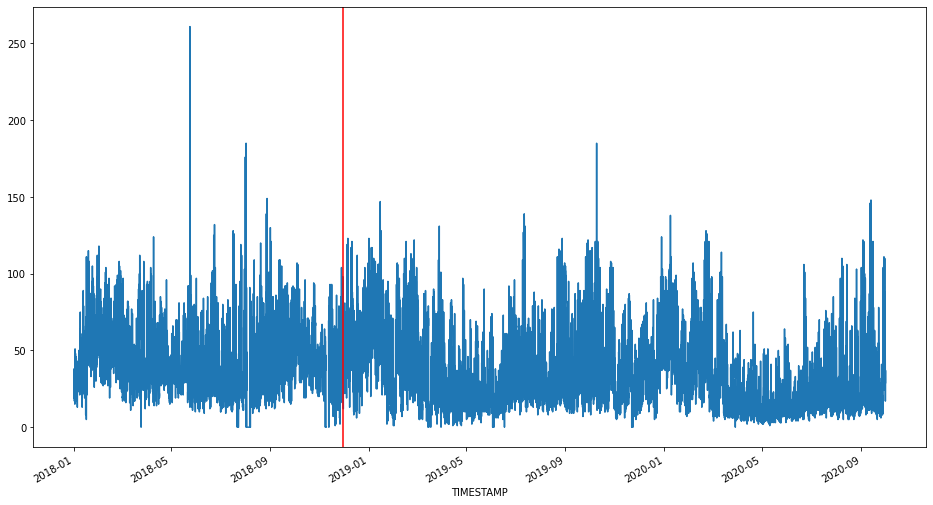

In [23]:
# Plot
# Vuestro código va a aquí....
df_magnitudes['NO2'].plot()
# ....
plt.axvline(x='2018-11-30', color='red')

### Segundo plot: medición de la diferencia

Esto no nos deja del todo bien observar si hay un impacto real... Vamos a plotear la diferencia punto a punto entre 2018, 2019 y 2020. Para ello vamos a realizar una serie de acciones:

**Resamplea los datos a frecuencia diaria, agregando con la media y haz un plot con una moving average de un año para observar la tendencia del NO2**

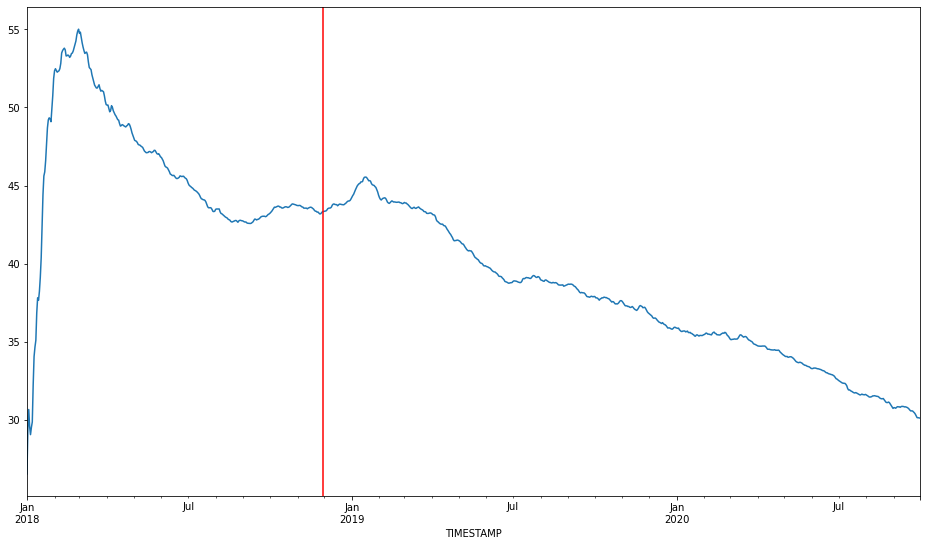

In [126]:
# Se realiza el resample con parámetro 'D' ya que es el que nos indica que la frecuencia sea diaria.
# Seleccionamos la columna NO2 ya que es la que queremos estudiar y realizamos la media daria.
# Por ultimo hacemos una moving con la media en una ventana de 1 año (365 días)

s_magnitudes_x_dia_NO2=df_magnitudes.resample('D')['NO2'].mean()
s_magnitudes_x_dia_NO2.rolling(365, min_periods=1).mean().plot()
#df_magnitudes.resample('D').NO2.mean().rolling(365, min_periods=1).mean().plot()
plt.axvline(x='2018-11-30', color='red')

**Calcula diferencia de niveles de NO2 para cada día con respecto al año anterior.** Pista: usa la función shift de pandas


In [127]:
#Hacemos un shift de 365 días hacia "abajo", para poner al mismo nivel los valores de 2019 con los de 2018.
# Este sería el valor de 2018-01-01
s_magnitudes_x_dia_NO2['2018-01-01']

26.541666666666668

In [128]:
# Este sería el valor de 2018-01-01
s_magnitudes_x_dia_NO2['2019-01-01']

65.0

In [129]:
# Este sería el valor desplazado 365 días del 2018-01-01,
# para que podamos hacer la resta entre el mismo día de 2019 y 2018
s_magnitudes_x_dia_NO2.shift(365)['2019-01-01']

26.541666666666668

In [130]:
# Hacemos la operacion para calcular la diferencia diaria entre los dias 2018 con 2019 y 2019 con 2020
s_magnitudes_x_dia_diff_NO2 = s_magnitudes_x_dia_NO2-s_magnitudes_x_dia_NO2.shift(365)
s_magnitudes_x_dia_diff_NO2 = s_magnitudes_x_dia_diff_NO2.dropna()
s_magnitudes_x_dia_diff_NO2['2019-01-01']

38.45833333333333

**Plotea el resultado tal cual, y suavizado.** ¿Cuál es tu conclusión?

<AxesSubplot:xlabel='TIMESTAMP'>

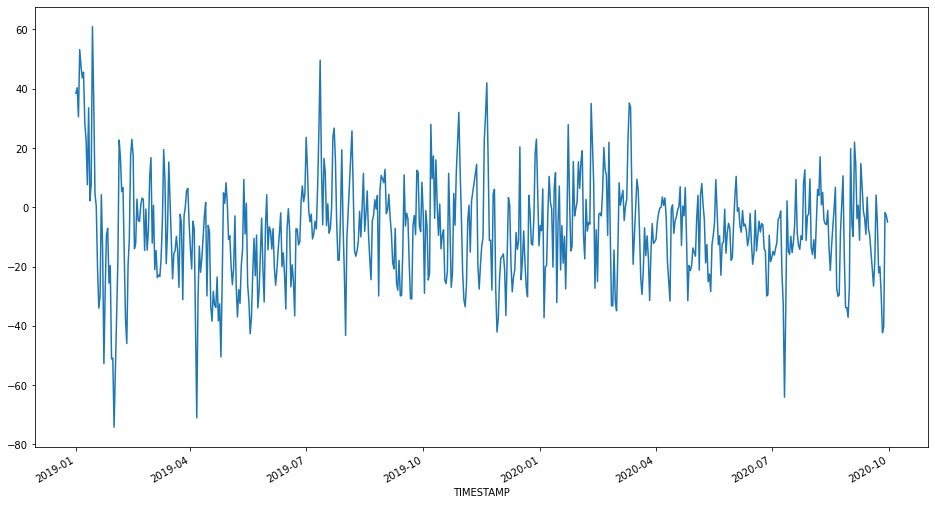

In [133]:
# Hacemos el plot tal cual
s_magnitudes_x_dia_diff_NO2.plot()
#plt.axvline(x='2018-11-30', color='red')

<AxesSubplot:xlabel='TIMESTAMP'>

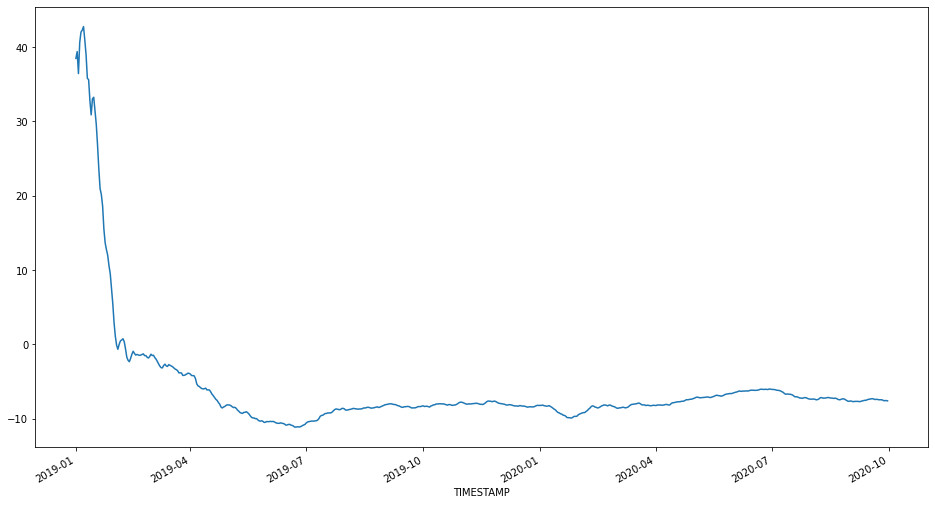

In [135]:
#Hacemos el plot suavizado
s_magnitudes_x_dia_diff_NO2.rolling(365, min_periods=1).mean().plot()
# plt.axvline(x='2018-11-30', color='red')

**¿Ha habido un descenso a nivel anual en la emisión media de los gases CO, NO, NO2 y NOx entre los años 2018 y 2019?.** 

In [150]:
# Mostramos la tendencia de los 4 gases durante 2018,2019 y 2020.
# suavizamos la gráfica con una ventana de 365 calculando la media
s_magnitudes_x_dia_Todos=df_magnitudes.resample('Y')['CO', 'NO', 'NO2','NOx'].mean()
s_magnitudes_x_dia_Todos

MAGNITUD,CO,NO,NO2,NOx
TIMESTAMP,,,,
2018-12-31,0.487926,20.235608,44.140552,74.867224
2019-12-31,0.452066,17.742998,35.899908,63.019972
2020-12-31,0.369039,11.659519,27.279045,44.959094


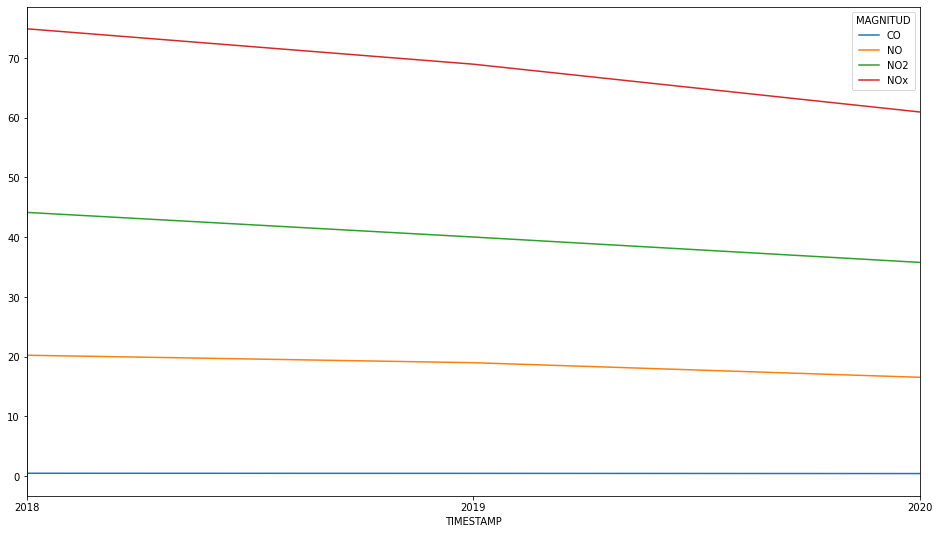

In [151]:
s_magnitudes_x_dia_Todos.rolling(365, min_periods=1).mean().plot()
plt.axvline(x='2018-11-30', color='red')

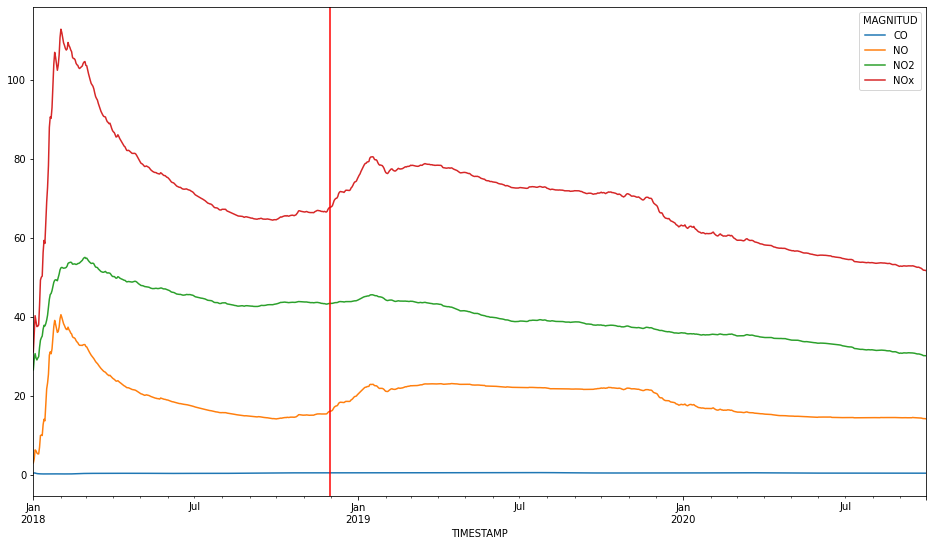

In [148]:
# Mostramos la tendencia de los 4 gases durante 2018,2019 y 2020.
# suavizamos la gráfica con una ventana de 365 calculando la media
s_magnitudes_x_dia_Todos=df_magnitudes.resample('D')['CO', 'NO', 'NO2','NOx'].mean()
s_magnitudes_x_dia_Todos.rolling(365, min_periods=1).mean().plot()
plt.axvline(x='2018-11-30', color='red')

<AxesSubplot:xlabel='TIMESTAMP'>

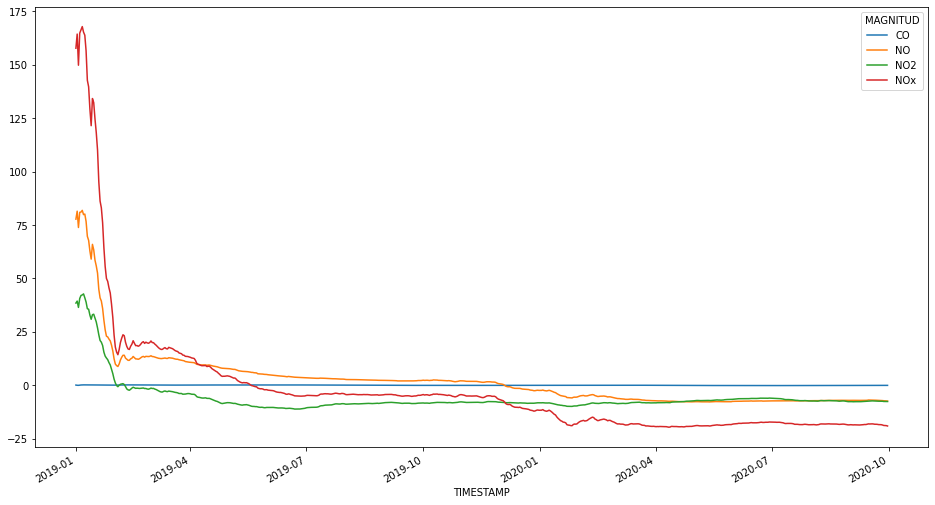

In [145]:
#Mostramo las diferencias diarias con respecto al añoa anterior
# Hacemos la operacion para calcular la diferencia diaria entre los dias 2018 con 2019 y 2019 con 2020
s_magnitudes_x_dia_diff_Todos = s_magnitudes_x_dia_Todos-s_magnitudes_x_dia_Todos.shift(365)
s_magnitudes_x_dia_diff_Todos = s_magnitudes_x_dia_diff_Todos.dropna()
s_magnitudes_x_dia_diff_Todos.rolling(365, min_periods=1).mean().plot()

**Esta variación puede deberse a un aumento/disminución de las precipitaciones entre esos dos años. Para ello disponemos de las precipitaciones a lo largo de los años 2018 y 2019 en Madrid. ¿Explica el comportamiento anual de las precipicationes la variación en los niveles de gases o podemos atribuir dicho efecto a la implementación de Madrid central?**

In [20]:
clima=pd.read_excel('histórico-clima.xlsx')

Podéis encontrar el paper con el estudio real aquí:

https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3495440